In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [42]:
csv_path = "vgsales.csv"

In [43]:
df = pd.read_csv(csv_path)



In [44]:
df.head()

,Rank,Year
0,1,2006.0
1,2,1985.0
2,3,2008.0
3,4,2009.0
4,5,1996.0


In [45]:
df.describe()

,Rank,Year
count,16325.000000,16325.000000
mean,8292.344502,2006.406187
std,4792.717699,5.829268
min,1.000000,1980.000000
25%,4136.000000,2003.000000
50%,8294.000000,2007.000000
75%,12441.000000,2010.000000
max,16600.000000,2020.000000


In [31]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Rank', ylabel='Density'>

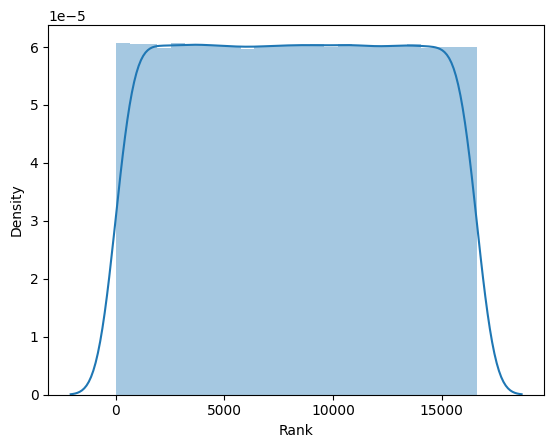

In [32]:
sns.distplot(df['Rank'])

In [ ]:
 # for now we ignore the seaborn warnings
# because the distplot is going to be replaced in the future
# and we currently don't have a better option for this kind of chart
import warnings
warnings.filterwarnings("ignore")

In [33]:
print(df['Year'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000. 1995. 2016. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]


In [34]:

# Replace non-numeric values with NaN in a specific column
column_name = 'Year'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=[column_name])

# Save the cleaned DataFrame to a new CSV file
output_file_path = 'vgsales.csv'
df.to_csv(output_file_path, index=False)

# Display the cleaned DataFrame
df.head()

,Rank,Year
0,1,2006.0
1,2,1985.0
2,3,2008.0
3,4,2009.0
4,5,1996.0


<Axes: xlabel='Year', ylabel='Density'>

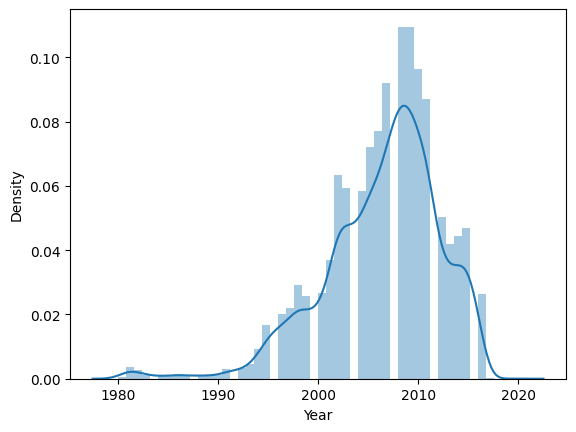

In [35]:
# quick chart, how is experience distributed in data
sns.distplot(df['Year'])

<Axes: xlabel='Rank', ylabel='Density'>

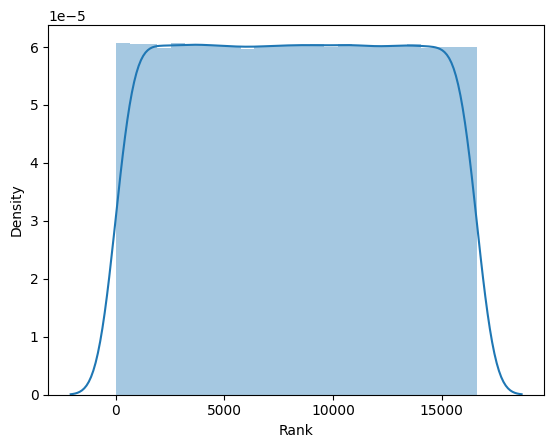

In [36]:
sns.distplot(df['Rank'])

In [23]:
selected_columns = ['Rank', 'Year']
df_selected = df[selected_columns]

# Save the DataFrame with only two columns to a new CSV file
output_file_path = 'selected_columns_file.csv'
df_selected.to_csv(output_file_path, index=False)

# Display the DataFrame with only two columns
df_selected.head()

,Rank,Year
0,1,2006.0
1,2,1985.0
2,3,2008.0
3,4,2009.0
4,5,1996.0


In [25]:
csv_path = "selected_columns_file.csv"

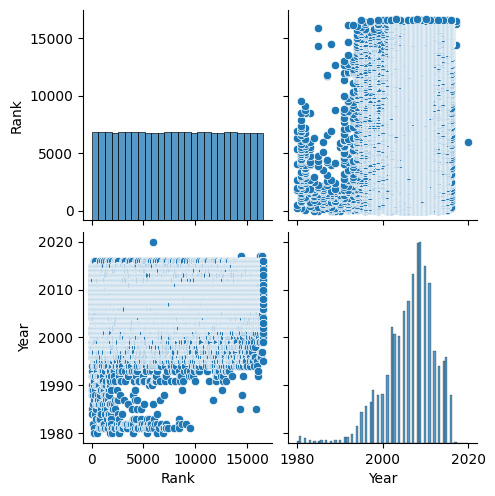

In [37]:
 sns.pairplot(df)

In [21]:
df.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [12]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [ ]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['YearsExperience']]

# have only the target variable here (dependent variable)
y = df['Salary']

In [ ]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
intercept = lm.intercept_

# this will be a list of variables (to support multiple linear regression)
# the slopes of the different variables in the linear regression formula
coefs = lm.coef_

# if you want to have a nice table of different variable values:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
YearsExperience,9577.17175


In [ ]:
# combine the variables for the linear regression formula
formula = f"y^ = {coefs[0]} * x + {intercept}"
formula

'y^ = 9577.171749746614 * x + 25975.814659541138'

In [ ]:
# make test predictions with new data with our model
predictions = lm.predict(X_test)

In [ ]:
# these values follow a line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
# interesting idea to try, add a regression line:
# https://python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib/
plt.scatter(y_test, predictions)
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
# this is our separate test data candidate
test_experience = 6

# let's try with some new imaginary data
tester_row = {
    'YearsExperience': test_experience
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [ ]:
result = lm.predict(tester_row)[0]

print()
print(f"Predicted salary with {test_experience} years of work experience:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted salary with 6 years of work experience:
83438.85 $
----------------


In [ ]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
3038.68 $

MSE
17978409.5 $^2

RMSE:
4240.1 $

R-squared:
0.97


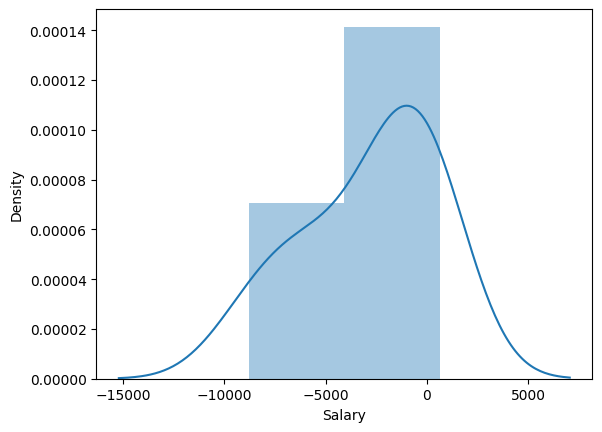

In [ ]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - predictions))
plt.show()
plt.close()

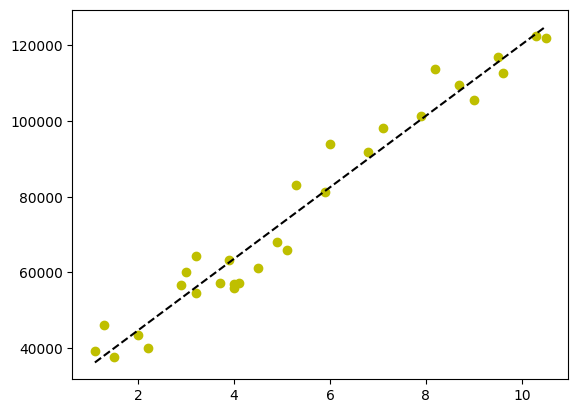

In [ ]:
 # this works only with two variables
# how it would be calculated manually
plot_x = df['YearsExperience']
plot_y = df['Salary']

coef_plot = np.polyfit(plot_x,plot_y,1)
poly1d_fn = np.poly1d(coef_plot)

# poly1d_fn is now a function which takes in x and returns an estimate for y
#'--k'=black dashed line, 'yo' = yellow circle marker
plt.plot(plot_x, plot_y, 'yo', plot_x, poly1d_fn(plot_x), '--k') 